# Predicción de precipitaciones en las próximas 24 hs con árboles de decisión.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Leemos el dataset con datos meteorológicos de Australia. La variable objetivo será RainTomorrow.
df = pd.read_csv('weatherAUS.zip')
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [4]:
# Preprocesamiento

df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
df = df.dropna()
df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)

In [5]:
# Defino las features y variable objetivo con los que voy a trabajar

X = df[['MinTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed3pm', 'Humidity3pm',
       'Pressure3pm', 'Temp3pm', 'RainToday_Yes']]
y = df["RainTomorrow_Yes"]

In [6]:
# Defino los set de datos de train y de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=78)

In [7]:
from sklearn import tree

clasif_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 8, min_samples_leaf = 200)
clasif_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=200)

In [8]:
from sklearn.metrics import accuracy_score

tree_pred = clasif_tree.predict(X_test)
score = accuracy_score(y_test, tree_pred)
score

0.8454944743553414

Text(0.5, 15.0, 'Etiquetas predichas')

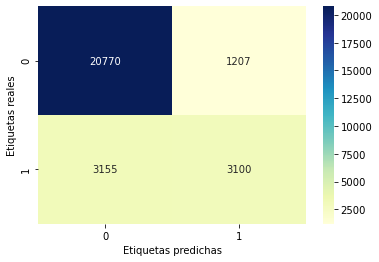

In [9]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='.0f', cmap='YlGnBu')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [10]:
cm = confusion_matrix(y_test, tree_pred)

In [11]:
TP = cm[1, 1]; TN = cm[0, 0] ; FP = cm[0, 1] ; FN = cm[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  3100  TN:  20770  FP:  1207  FN:  3155


In [12]:
# Calculamos el recall

print('Recall=', (TP)/ (TP+FN))
print('Total de casos positivos predichos correctamente (TP) =',(TP))
print('Total de casos positivos reales (TP+FN) =',(TP+FN))

Recall= 0.495603517186251
Total de casos positivos predichos correctamente (TP) = 3100
Total de casos positivos reales (TP+FN) = 6255


In [13]:
# Calculamos la precision

from sklearn.metrics import precision_score
print(precision_score(y_test, tree_pred))

#print('Precision =', (TP)/(TP+FP))

0.7197585326213142


In [14]:
# Calculemos la metrica F1

from sklearn.metrics import f1_score

print(f1_score(y_test, tree_pred))

0.5870100359780345


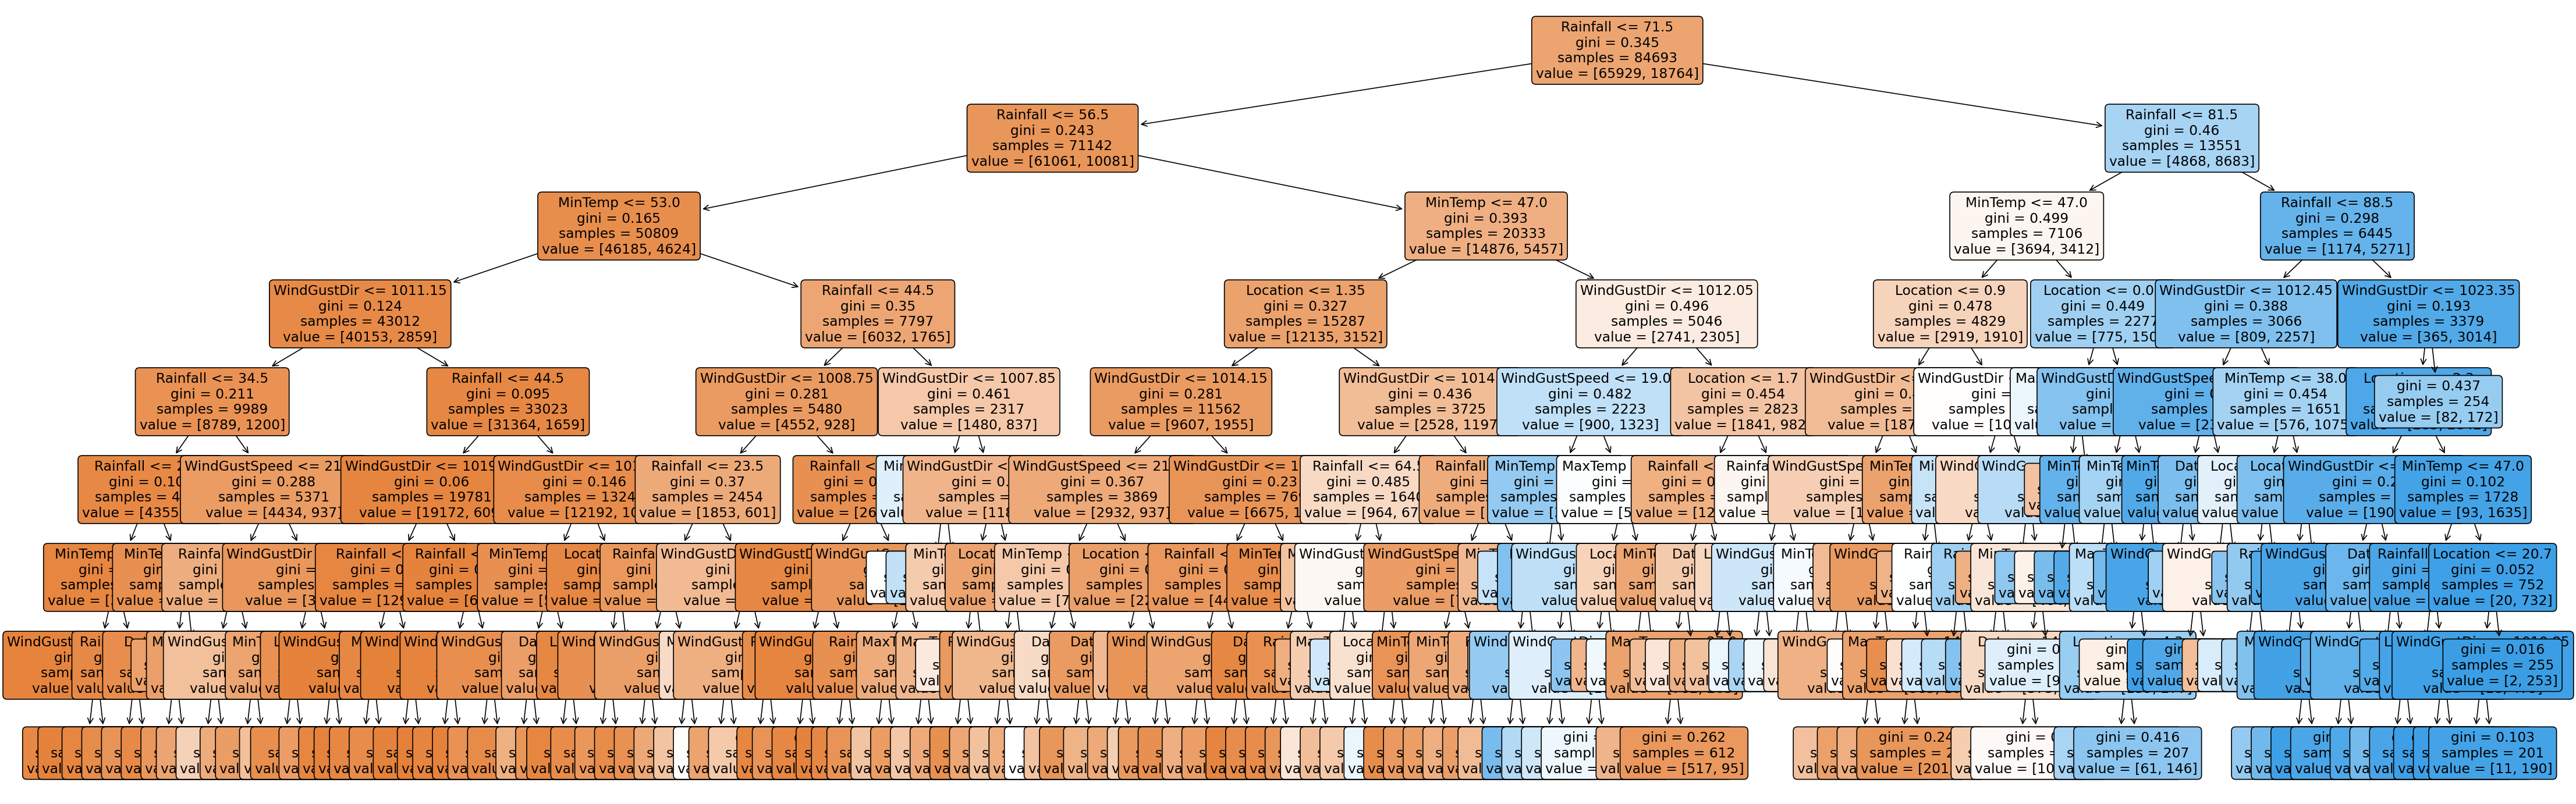

In [15]:
# Graficamos el árbol obtenido para ver su forma

plt.figure(figsize=(45,15), dpi= 120)
tree.plot_tree(clasif_tree, feature_names=df.columns[:-1], filled=True, rounded=True, fontsize=14)

print()

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=4000, n_jobs=-1 , max_samples=0.8, random_state=42, oob_score=True)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=4000, n_jobs=-1,
                       oob_score=True, random_state=42)

In [17]:
y_randf = rf_clf.predict(X_test)
confusion_matrix(y_test, y_randf)

array([[20896,  1081],
       [ 3064,  3191]])

Text(0.5, 15.0, 'Etiquetas predichas')

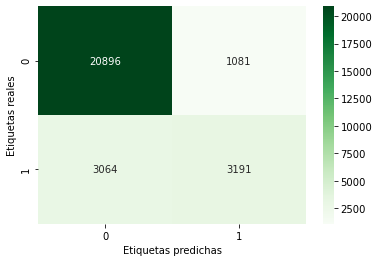

In [18]:
confusion_matrix(y_test, y_randf)
sns.heatmap(confusion_matrix(y_test, y_randf), annot=True, fmt='.0f', cmap='Greens')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [19]:
accuracy_score(y_test, y_randf)

0.8531807877585719

In [20]:
from sklearn.metrics import recall_score

recall_score(y_test, y_randf)

0.5101518784972022

In [21]:
print(precision_score(y_test, y_randf))

0.7469569288389513


In [22]:
print(f1_score(y_test, y_randf))

0.6062505937114087


In [25]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

0.8701316837052268